<img src="images/data_transformation.jpg" width="700">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Transformation</a></span><ul class="toc-item"><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reading data<a class="anchor" id="readingdata"></a></a></span></li><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Handle missing values</a></span><ul class="toc-item"><li><span><a href="#Replace-using-median" data-toc-modified-id="Replace-using-median-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Replace using median</a></span></li><li><span><a href="#Erase-non-important-feature" data-toc-modified-id="Erase-non-important-feature-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Erase non important feature</a></span></li><li><span><a href="#Replace-categorical-value-with-most-frequent-value" data-toc-modified-id="Replace-categorical-value-with-most-frequent-value-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Replace categorical value with most frequent value</a></span></li></ul></li><li><span><a href="#Data-skewness" data-toc-modified-id="Data-skewness-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data skewness</a></span><ul class="toc-item"><li><span><a href="#Distribution-plots-of-the-data" data-toc-modified-id="Distribution-plots-of-the-data-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Distribution plots of the data</a></span></li><li><span><a href="#Handling-positively-skewed-cols" data-toc-modified-id="Handling-positively-skewed-cols-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Handling positively skewed cols</a></span><ul class="toc-item"><li><span><a href="#Applying-Square-root-transformation" data-toc-modified-id="Applying-Square-root-transformation-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Applying Square root transformation</a></span></li><li><span><a href="#Applying-logarithmic-transformation" data-toc-modified-id="Applying-logarithmic-transformation-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Applying logarithmic transformation</a></span></li></ul></li></ul></li><li><span><a href="#Detect-Outliers" data-toc-modified-id="Detect-Outliers-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Detect Outliers</a></span><ul class="toc-item"><li><span><a href="#Box-plots-of-the-data" data-toc-modified-id="Box-plots-of-the-data-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Box plots of the data</a></span></li><li><span><a href="#The-interquartile-range-(IQR)" data-toc-modified-id="The-interquartile-range-(IQR)-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>The interquartile range (IQR)</a></span></li></ul></li><li><span><a href="#Encoding-features" data-toc-modified-id="Encoding-features-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Encoding features</a></span><ul class="toc-item"><li><span><a href="#Use-label-encoder-for-2-or-3-unique-features" data-toc-modified-id="Use-label-encoder-for-2-or-3-unique-features-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Use label encoder for 2 or 3 unique features</a></span></li><li><span><a href="#One-hot-encoder-for-the-rest" data-toc-modified-id="One-hot-encoder-for-the-rest-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>One hot encoder for the rest</a></span></li></ul></li><li><span><a href="#Scaling-/-Normalizing" data-toc-modified-id="Scaling-/-Normalizing-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Scaling / Normalizing</a></span></li></ul></li></ul></div>

# Data Transformation

In [1]:
import pandas as pd

## Reading data<a class="anchor" id="readingdata"></a>

In [2]:
df_train = pd.read_csv('titanic/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handle missing values

In [4]:
import missingno as msno

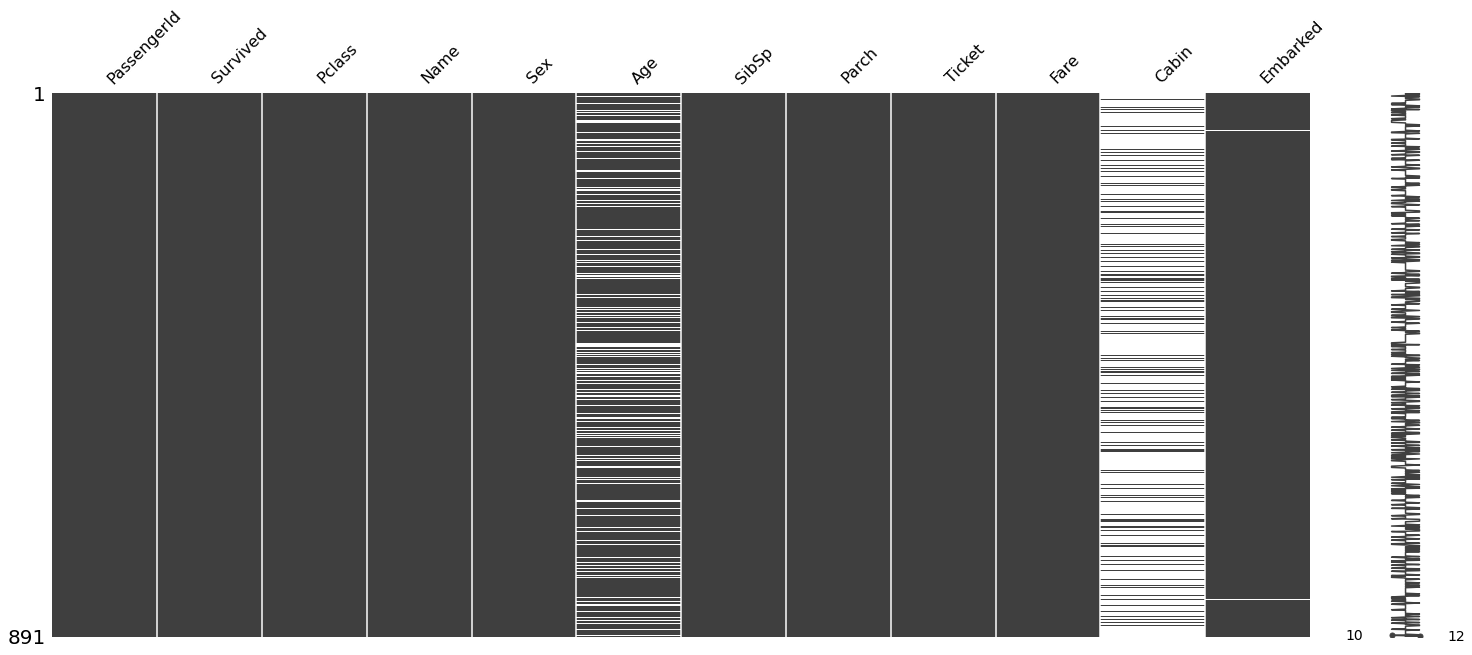

In [5]:
msno.matrix(df_train)

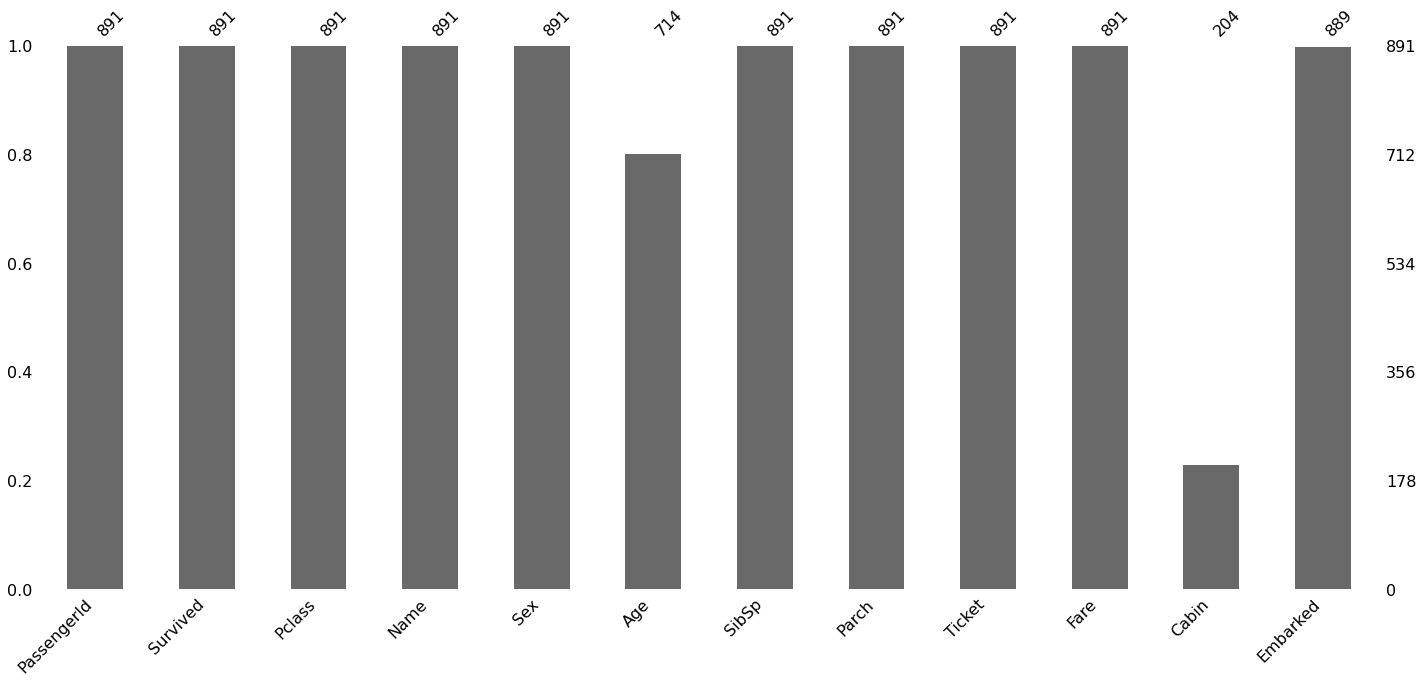

In [6]:
msno.bar(df_train)

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can observe Age,Cabin and Embarked features contain missing values 177, 687 and 2 values to be exact.

* Cabin is less than the 20% of the available data, so we will drop the column because it is not going to apport valuable information.
* Embarked feature has only 2 missing values we can erase or change them with the median.
* Age is the most delicate feature, due to changing with the median will affect to the dataset. We will try to infer the best age by grouo or class.

### Replace using median

In [8]:
# Replace using median 
age_median = df_train.Age.median()
df_train.Age.fillna(age_median, inplace=True)

### Erase non important feature

In [9]:
# Erase cabin feature
df_train = df_train.drop(['Cabin'], axis=1)

### Replace categorical value with most frequent value

In [10]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [11]:
print(df_train.Embarked.describe())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


In [12]:
common_value = 'S'

df_train['Embarked'] = df_train.Embarked.fillna(common_value)

In [13]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data skewness

### Distribution plots of the data

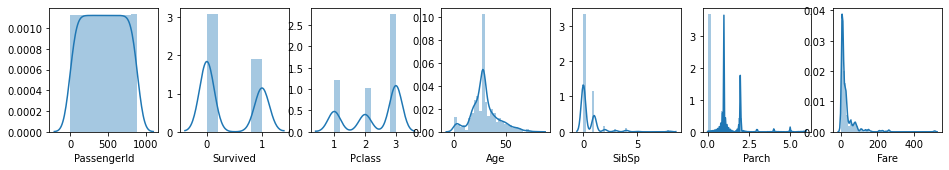

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

data_columns = df_train._get_numeric_data().columns.values
plot_columns = 7
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(16,5))

# plot distribution
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i+1)
    sns.distplot(df_train[data_columns[i]], kde=True) 

As we can observe in the above distribution graphs the majority of the features are far from the normal distribution. Moreover, we can observe that some of the features have positive skewness (right) and there is not any negative skewness (left). In orther to achieve a normal distribution in these features we will use the next transformations:
* **Positive skewed features**:
       - Square root tranformation
       - Cube root transformation
       - Log transformation
* **Negative skewed features** (if there is):
        - Square transformation
        - Cube transformation



In [15]:
positively_skewed_cols = ['Age', 'Fare']
#negatively_skewed_cols = ['']

### Handling positively skewed cols
#### Applying Square root transformation

In [16]:
for col in df_train._get_numeric_data().columns:
    if col in positively_skewed_cols:
        df_train[col] = df_train[col].apply(lambda x : np.sqrt(x)) 

#### Applying logarithmic transformation

In [17]:
#for col in df_train.columns:
#    if col in positively_skewed_cols:
#        df_train[col] = df_train[col].apply(lambda x : np.log(x+1)) 

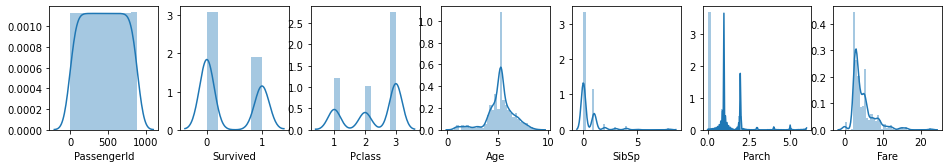

In [18]:
data_columns = df_train._get_numeric_data().columns.values
plot_columns = 7
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(16,5))

# plot distribution
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i+1)
    sns.distplot(df_train[data_columns[i]], kde=True) 

## Detect Outliers

### Box plots of the data

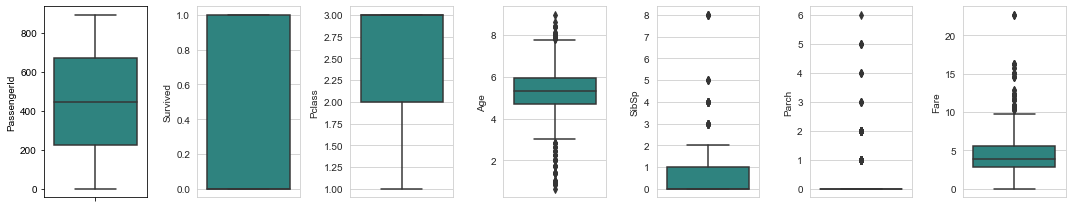

In [19]:
data_columns = df_train._get_numeric_data().columns.values
plot_columns = 7
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(15,3))
for i in range(0,len(data_columns)):
    plt.subplot(number_of_columns, number_of_rows, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_train[data_columns[i]],palette='viridis',orient='v')
    plt.tight_layout()

In [20]:
outlier_cols = ['Age', 'Fare']

### The interquartile range (IQR)
Is a measure of variability, based on dividing a data set into quartiles.

Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

* Q1 is the "middle" value in the first half of the rank-ordered data set.
* Q2 is the median value in the set.
* Q3 is the "middle" value in the second half of the rank-ordered data set.

The interquartile range (IQR) is equal to Q3 minus Q1.

   * **upperbound** = IQR * 1.5 + Q3 
   * **lowerbound** = IQR * (-1.5) + Q1

If the data is higher than IQR*1.5 + Q3 or lower than the IQR * (-1.5) + Q1 it would be an outlier and we can replace it by the upper or lower bound.

In [21]:
for col in outlier_cols: 
    quartile_1, quartile_3 = np.percentile(df_train[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    df_train[col] = np.where(df_train[col] > upper_bound, upper_bound, df_train[col])
    df_train[col] = np.where(df_train[col] < lower_bound, lower_bound, df_train[col])

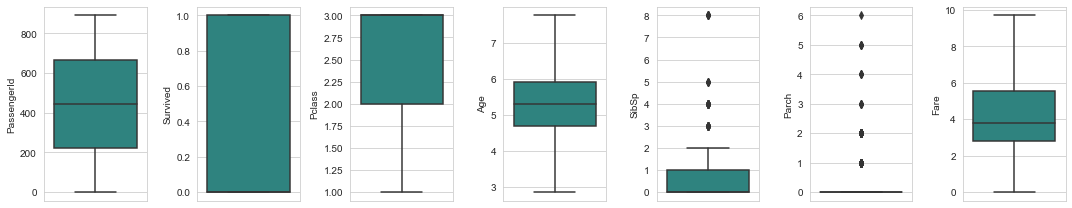

In [22]:
data_columns = df_train._get_numeric_data().columns.values
plot_columns = 7
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(15,3))
for i in range(0,len(data_columns)):
    plt.subplot(number_of_columns, number_of_rows, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_train[data_columns[i]],palette='viridis',orient='v')
    plt.tight_layout()

## Encoding features

In [23]:
df_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Name        891 non-null object
Sex         891 non-null object
Ticket      891 non-null object
Embarked    891 non-null object
dtypes: object(4)
memory usage: 28.0+ KB


In [24]:
df_train.describe(include='O')

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Meyer, Mr. August",male,347082,S
freq,1,577,7,646


### Use label encoder for 2 or 3 unique features

In [27]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(df_train.Sex)
df_train['Sex'] = le_sex.transform(df_train.Sex)

le_embarked = LabelEncoder()
le_embarked.fit(df_train.Embarked)
df_train['Embarked'] = le_embarked.transform(df_train.Embarked)

In [35]:
print(df_train.Sex.unique())
print(df_train.Embarked.unique())

[1 0]
[2 0 1]


### One hot encoder for the rest

In [36]:
df_names = pd.get_dummies(df_train.Name)
df_ticket = pd.get_dummies(df_train.Ticket)

In [37]:
df_names

,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abbott, Mrs. Stanton (Rosa Hunt)","Abelson, Mr. Samuel","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Aks, Mrs. Sam (Leah Rosen)","Albimona, Mr. Nassef Cassem",...,"Yrois, Miss. Henriette (""Mrs Harbeck"")","Zabour, Miss. Hileni","Zabour, Miss. Thamine","Zimmerman, Mr. Leo","de Messemaeker, Mrs. Guillaume Joseph (Emma)","de Mulder, Mr. Theodore","de Pelsmaeker, Mr. Alfons","del Carlo, Mr. Sebastiano","van Billiard, Mr. Austin Blyler","van Melkebeke, Mr. Philemon"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are not going to use these features (names and ticket), because they are too much and seem irrelevant.

In [38]:
df_train = df_train.drop(['Name','Ticket'], axis=1)

All the data is now numeric.

## Scaling / Normalizing

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train.loc[:] = scaler.fit_transform(df_train.loc[:])

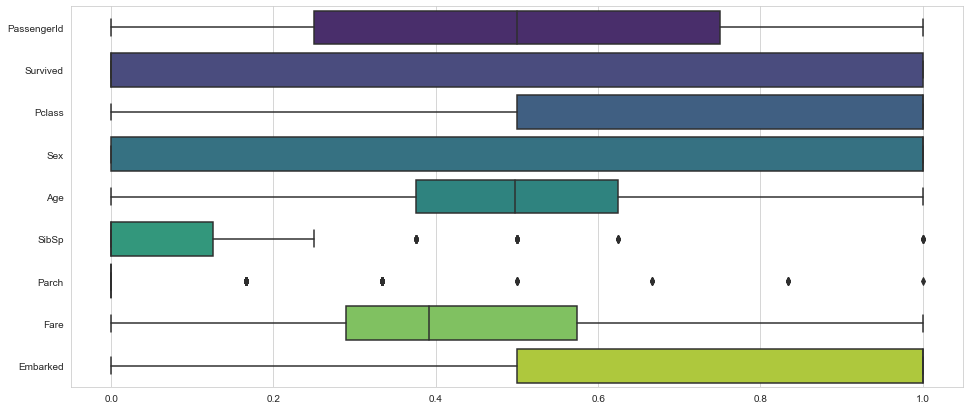

In [40]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df_train.loc[:] , orient="h", palette="viridis")

Now we can see that our data is transformed:
    * It doens't have missing values.
    * The skewness has been removed.
    * The outliers has been removed.
    * The categorical features are encoded.
    * It is scaled from 0 to 1.